# Redes fully connected para classificação:


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ReduceLROnPlateau

from sklearn.datasets import load_digits, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [ ]:
X, Y = load_digits(return_X_y=True, n_class=2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('linear'),
    Dense(1),
    Activation('sigmoid'),
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'], )

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=8, validation_data=[x_test, y_test])

Epoch 1/10
32/32 [==============================] - 1s 6ms/step - loss: 0.1402 - accuracy: 0.9563 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 4.0429e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 3.2080e-04 - accuracy: 1.0000 - val_loss: 7.8642e-04 - val_accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 2.4374e-04 - accuracy: 1.0000 - val_loss: 5.7765e-04 - val_accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 1.8884e-04 - accuracy: 1.0000 - val_loss: 4.3447e-04 - val_accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 1.4926e-04 - accuracy: 1.0000 - val_loss: 3.5756e-04 - val_a

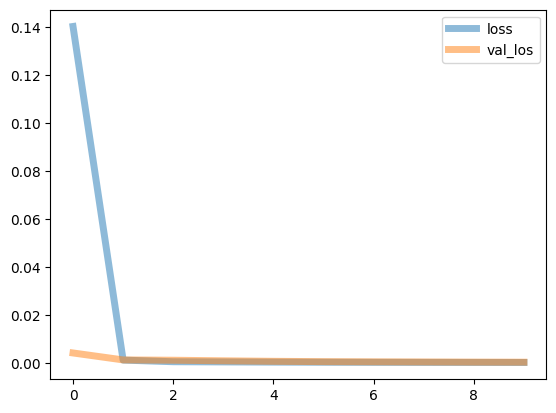

In [ ]:
plt.plot(hist.history['loss'], label='loss', lw=5, alpha=0.5)
plt.plot(hist.history['val_loss'], label='val_los', lw=5, alpha=0.5)
plt.legend()

In [ ]:
y_pred_soft = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int) # Vamos binarizar esses dados

4/4 [==============================] - 0s 8ms/step


In [ ]:
print(y_pred_soft.flatten())
print(y_pred.flatten())

[8.46876719e-06 6.58753061e-06 2.93717608e-06 1.00000000e+00
 6.21751906e-06 1.00000000e+00 9.99999881e-01 2.99063860e-04
 1.00000000e+00 9.99999404e-01 8.13035240e-06 2.78651527e-07
 9.99999881e-01 3.88929675e-06 3.85000249e-06 9.99986172e-01
 8.49879367e-09 9.99759555e-01 3.99315411e-07 1.50568922e-05
 1.00000000e+00 1.00000000e+00 9.99999464e-01 9.99989629e-01
 9.99999821e-01 1.00000000e+00 8.27040458e-06 2.45814635e-06
 4.45994965e-06 9.99772429e-01 1.61432290e-05 1.56344182e-08
 1.00000000e+00 4.82123096e-06 2.19031193e-08 4.02249206e-10
 9.99937296e-01 9.99999881e-01 9.99991894e-01 7.69690436e-04
 3.46586972e-08 9.99999881e-01 9.98143494e-01 4.43603568e-07
 9.99955416e-01 9.99976635e-01 1.00000000e+00 9.99529481e-01
 9.99965429e-01 1.63849529e-06 1.06741211e-07 9.99999762e-01
 9.88480565e-07 9.99999821e-01 9.99997795e-01 1.55306381e-07
 2.73747833e-06 9.99999523e-01 1.00000000e+00 9.99998331e-01
 9.99998868e-01 2.32942412e-07 9.99999762e-01 9.99999940e-01
 9.99254346e-01 1.000000

In [ ]:
matriz_confusao = confusion_matrix(y_test, y_pred)

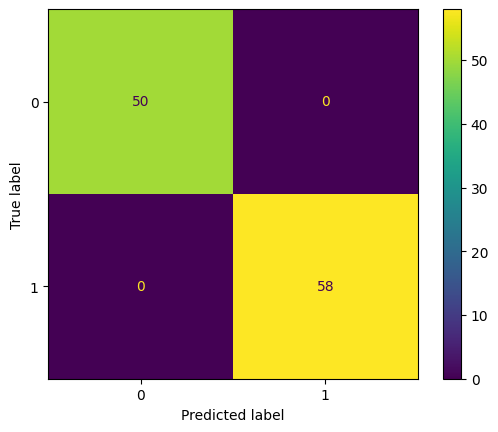

In [ ]:
ConfusionMatrixDisplay(matriz_confusao).plot()

# Regressão Linear usando uma rede neural:

In [ ]:
X, Y = load_diabetes(return_X_y=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [44]:
model = Sequential([
    Dense(1, input_dim=x_train.shape[1]),
    Activation('linear')
])

In [ ]:
model.compile(optimizer='SGD',
              loss='mean_squared_error', metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 11 (44.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist= model.fit(x_train,
                y_train,
                epochs=100,
                batch_size=10,
                validation_data=[x_test, y_test])

Epoch 1/100
27/27 [==============================] - 0s 6ms/step - loss: 21585.7832 - mean_squared_error: 21585.7832 - val_loss: 11584.2939 - val_mean_squared_error: 11584.2939
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 11465.7744 - mean_squared_error: 11465.7744 - val_loss: 6929.8447 - val_mean_squared_error: 6929.8447
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 8154.5688 - mean_squared_error: 8154.5688 - val_loss: 5518.2310 - val_mean_squared_error: 5518.2310
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 7001.9097 - mean_squared_error: 7001.9097 - val_loss: 5086.1040 - val_mean_squared_error: 5086.1040
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 6577.8262 - mean_squared_error: 6577.8262 - val_loss: 4988.7124 - val_mean_squared_error: 4988.7124
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 6431.2051 - mean_squared_error: 6431.2051 - val_loss: 49

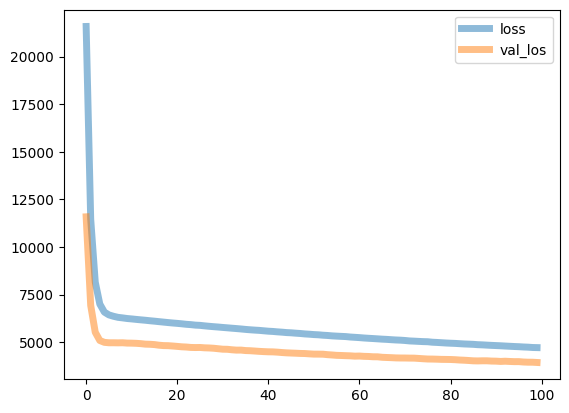

In [ ]:
plt.plot(hist.history['loss'], label='loss', lw=5, alpha=0.5)
plt.plot(hist.history['val_loss'], label='val_los', lw=5, alpha=0.5)
plt.legend()

In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 2ms/step


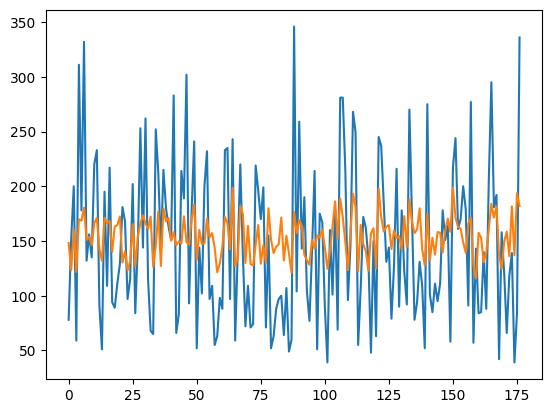

In [ ]:
plt.plot(y_test.flatten());
plt.plot(y_pred.flatten());

# Por que não ficou bom?

* Uma dica: Padronização de features

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
model.compile(optimizer='SGD',
              loss='mean_squared_error', metrics=['mean_squared_error'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [ ]:
hist= model.fit(x_train,
                y_train,
                epochs=100,
                batch_size=10,
                validation_data=[x_test, y_test],
                callbacks=[reduce_lr])

Epoch 1/100
27/27 [==============================] - 0s 8ms/step - loss: 34860.3320 - mean_squared_error: 34860.3320 - val_loss: 5594.8096 - val_mean_squared_error: 5594.8091 - lr: 0.0100
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 3830.7461 - mean_squared_error: 3830.7461 - val_loss: 3244.2515 - val_mean_squared_error: 3244.2517 - lr: 0.0100
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 3067.6123 - mean_squared_error: 3067.6123 - val_loss: 3056.6169 - val_mean_squared_error: 3056.6169 - lr: 0.0100
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 2949.5679 - mean_squared_error: 2949.5679 - val_loss: 2992.3179 - val_mean_squared_error: 2992.3179 - lr: 0.0100
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 2921.6819 - mean_squared_error: 2921.6819 - val_loss: 3018.5767 - val_mean_squared_error: 3018.5767 - lr: 0.0100
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - l

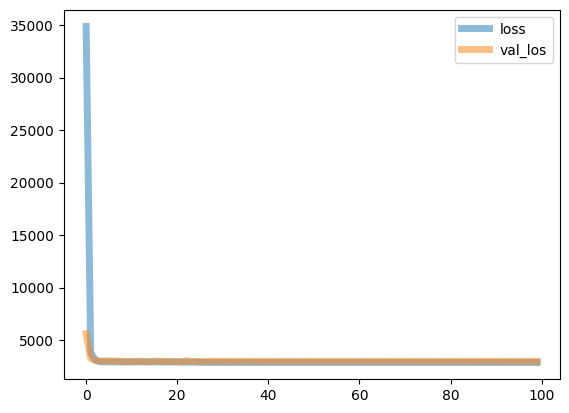

In [ ]:
plt.plot(hist.history['loss'], label='loss', lw=5, alpha=0.5)
plt.plot(hist.history['val_loss'], label='val_los', lw=5, alpha=0.5)
plt.legend()

In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 2ms/step


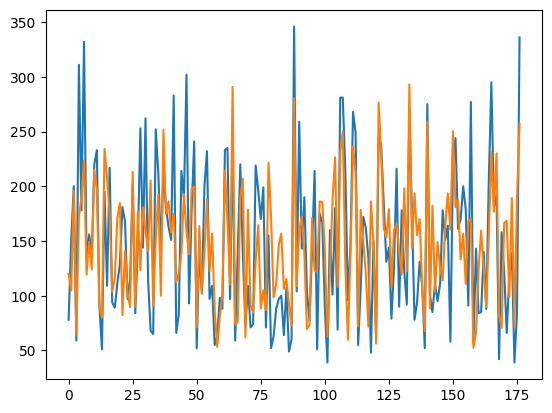

In [ ]:
plt.plot(y_test.flatten());
plt.plot(y_pred.flatten());

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.36490893654813894